In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset Exploration

In [4]:
wine = pd.read_csv('/content/gdrive/MyDrive/winemag-data-130k-v2.csv')
#wine = pd.read_csv("winemag-data-130k-v2.csv")
#wine = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DSCI 591/winemag-data-130k-v2.csv')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [7]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
wine[['Unnamed: 0', 'taster_name', 'taster_twitter_handle', 'title']].head()

,Unnamed: 0,taster_name,taster_twitter_handle,title
0,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,1,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,2,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,3,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,4,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


In [8]:
wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [9]:
for col in wine:
  print(col, ", Levels = ", wine[col].nunique())
  print(wine[col].unique(), )
  print()

Unnamed: 0 , Levels =  129971
[     0      1      2 ... 129968 129969 129970]

country , Levels =  43
['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt']

description , Levels =  119955
["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.

In [10]:
for col in wine:
  print(col, ", Levels = ", wine[col].nunique())
  print(wine[col].value_counts(), )
  print()

Unnamed: 0 , Levels =  129971
0         1
86642     1
86655     1
86654     1
86653     1
         ..
43319     1
43318     1
43317     1
43316     1
129970    1
Name: Unnamed: 0, Length: 129971, dtype: int64

country , Levels =  43
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73

In [ ]:
# to do's
## preprocessing:
    # drop duplicates
    # what features will we be using to build our recommender system (planning for the future here...)
    # Francis - Need to rectify missing values. Particularly price, should we just omit those rows?


## EDA:
    # word count occurrences in higher rated wines vs lower rated wines
    # histograms for price and points


In [11]:
#Remove duplicate reviews and drop Unnamed: 0 since this is just a meaningless index column
wine = wine.drop_duplicates(subset=['taster_name', 'title'])
wine = wine.drop("Unnamed: 0", axis=1)

Text(0.5, 0, 'Country')

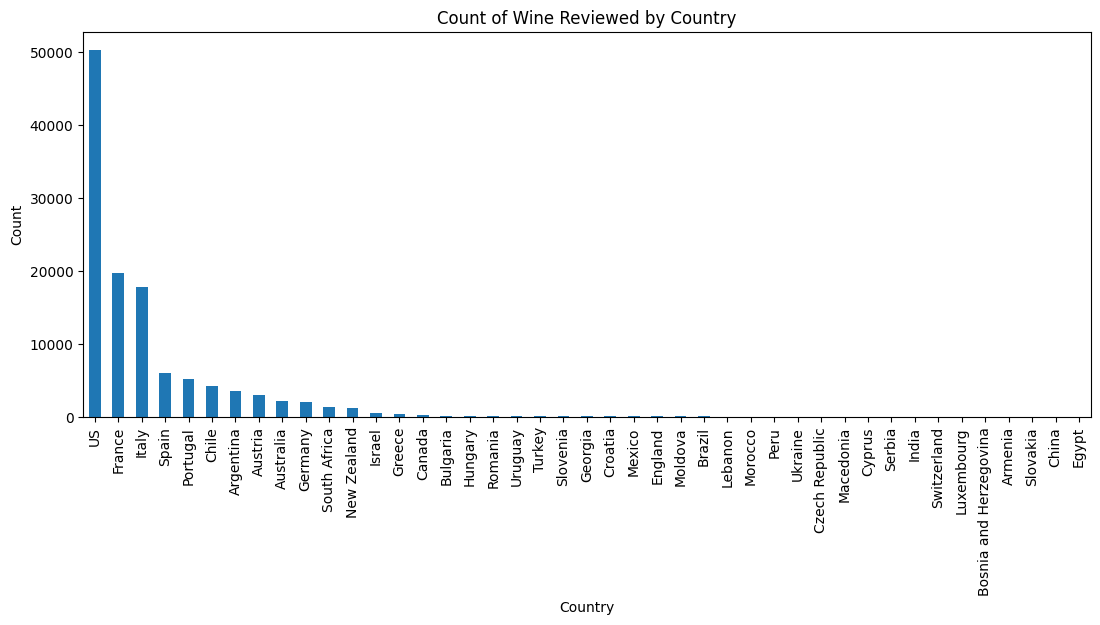

In [12]:
plt.figure(figsize=(13,5))
wine['country'].value_counts().plot.bar()
plt.title("Count of Wine Reviewed by Country")
plt.ylabel('Count')
plt.xlabel('Country')

Text(0.5, 0, 'Points')

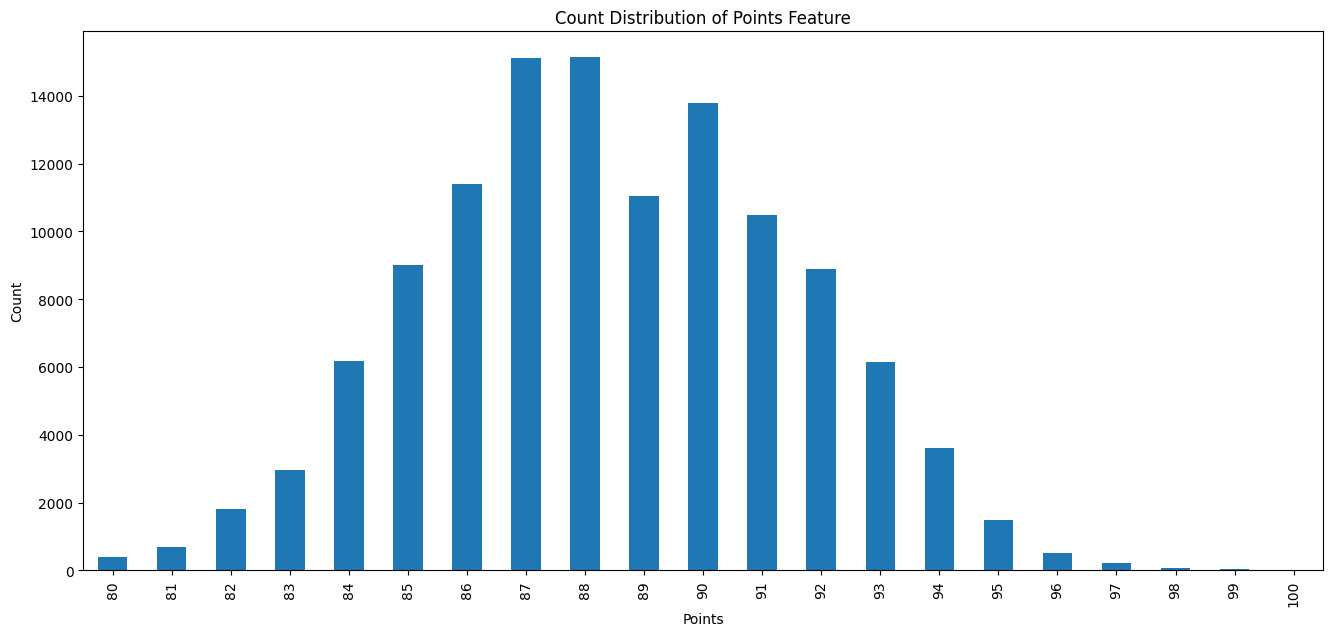

In [13]:
plt.figure(figsize=(16,7))
wine['points'].value_counts().sort_index().plot.bar()
plt.title("Count Distribution of Points Feature")
plt.ylabel('Count')
plt.xlabel('Points')

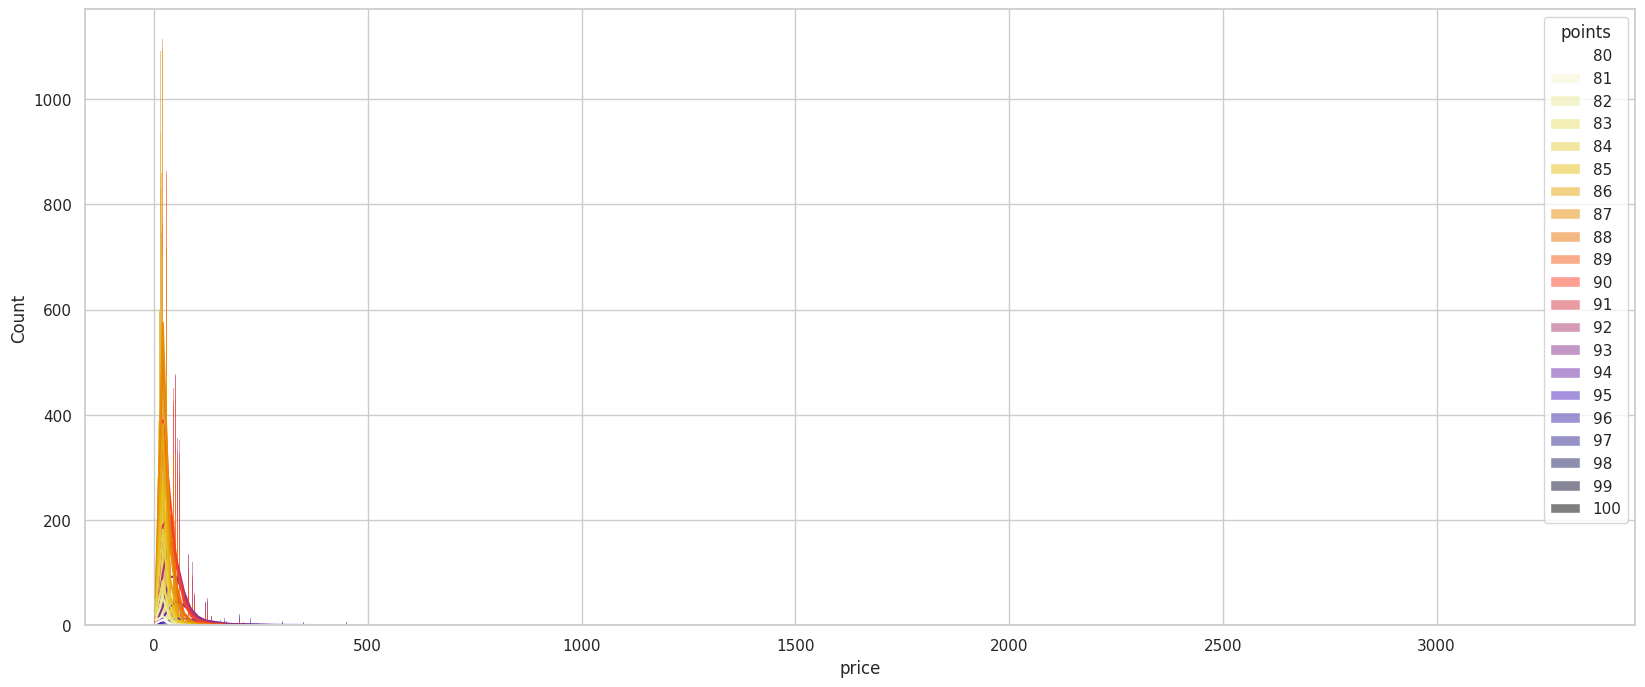

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")
sns.histplot(data=wine, x = "price", hue = wine["points"], kde = True, palette = 'CMRmap_r')
plt.ylabel("Count")
#the tplt.title('Distribution of Price per Bottle of Wine')
plt.show()
plt.clf()

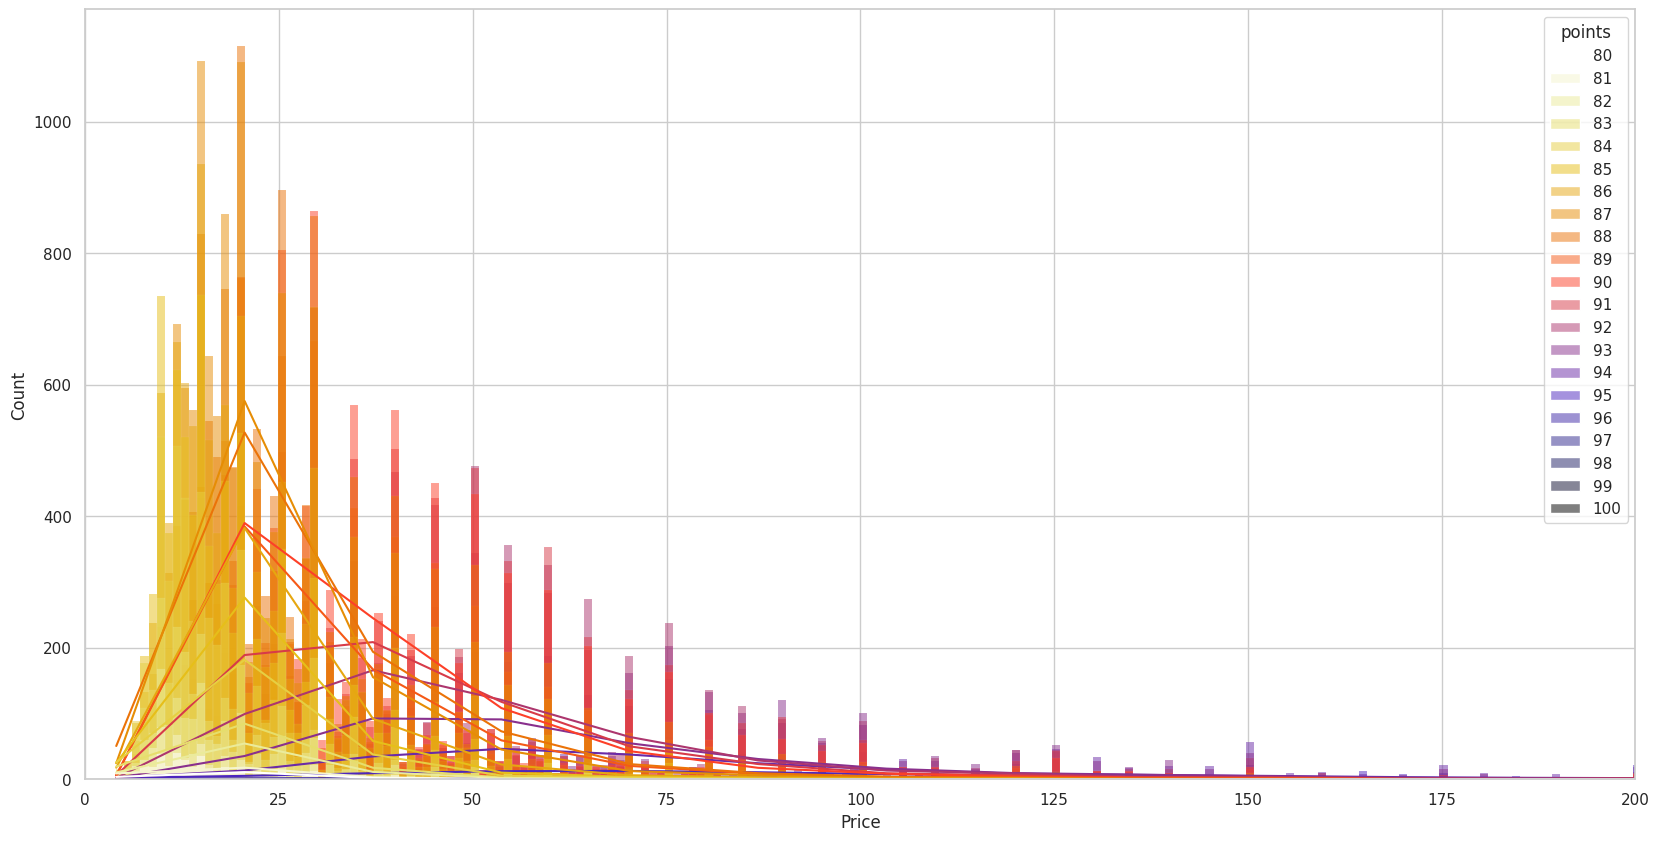

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize = (20,10))
sns.set_theme(style="whitegrid")
sns.histplot(data=wine, x = "price", hue = wine["points"], kde = True, palette = 'CMRmap_r')
plt.xlim(0,200)
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()
plt.clf()

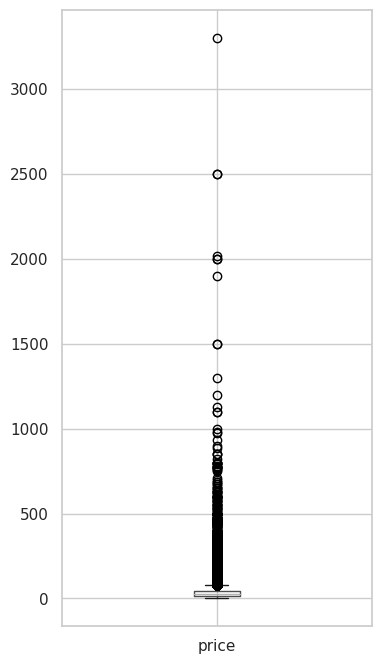

In [16]:
wine.boxplot(column=['price'], figsize=(4,8));

array([[<Axes: title={'center': 'price'}>]], dtype=object)

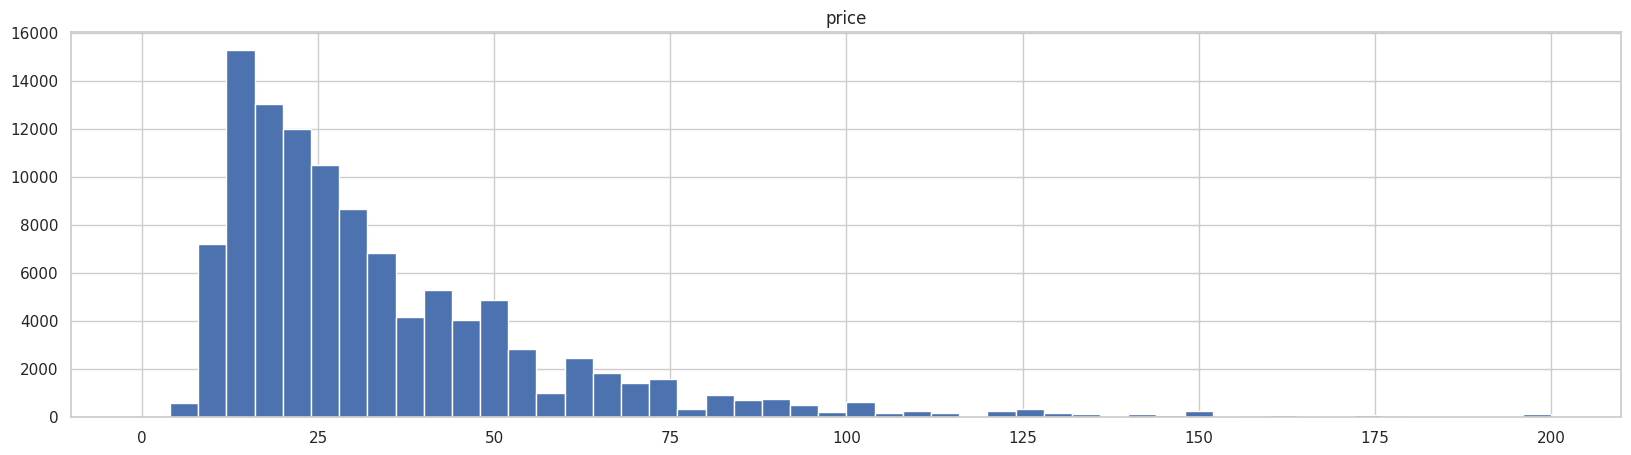

In [17]:
wine.hist(column=['price'], figsize=(20,5), bins = 50, range=(0,200))

In [18]:
wine['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [19]:
exclusions = set(['a',
'about',
'above',
'after',
'again',
'against',
'all',
'also',
'am',
'an',
'and',
'any',
'are',
"arent",
'as',
'at',
'be',
'because',
'been',
'before',
'being',
'below',
'between',
'both',
'but',
'by',
'can',
"cant",
'cannot',
'com',
'could',
"couldnt",
'did',
"didnt",
'do',
'does',
"doesnt",
'doing',
"dont",
'down',
'during',
'each',
'else',
'ever',
'few',
'for',
'from',
'further',
'get',
'had',
"hadnt",
'has',
"hasnt",
'have',
"havent",
'having',
'he',
"hed",
"hell",
"hes",
'hence',
'her',
'here',
"heres",
'hers',
'herself',
'him',
'himself',
'his',
'how',
"hows",
'however',
'http',
'i',
"id",
"ill",
"im",
"ive",
'if',
'in',
'into',
'is',
"isnt",
'it',
'its',
'itself',
'just',
'k',
"lets",
'like',
'me',
'more',
'most',
"mustnt",
'my',
'myself',
'no',
'nor',
'not',
'now',                
'of',
'off',
'on',
'once',
'only',
'or',
'other',
'otherwise',
'ought',
'our',
'ours',
'ourselves',
'out',
'over',
'own',
'r',
'same',
'shall',
"shant",
'she',
"shed",
"shell",
"shes",
'should',
"shouldnt",
'since',
'so',
'some',
'such',
'than',
'that',
"thats",
'the',
'their',
'theirs',
'them',
'themselves',
'then',
'there',
"theres",
'therefore',
'these',
'they',
"theyd",
"theyll",
"theyre",
"theyve",
'this',
'those',
'through',
'to',
'too',
'under',
'until',
'up',
'very',
'was',
"wasnt",
'we',
"wed",
"well",
"were",
"weve",
"werent",
'what',
"whats",
'when',
"whens",
'where',
"wheres",
'which',
'while',
'who',
"whos",
'whom',
'why',
"whys",
'with',
"wont",
'would',
"wouldnt",
'www',
'you',
"youd",
"youll",
"youre",
"youve",
'your',
'yours',
'yourself',
'yourselves'])

In [22]:
import string

def clean_description(x):
    if isinstance(x, str):
        x = x.lower()
        x = x.translate(str.maketrans('', '', string.punctuation))
        x = x.split()
        final_lst = []
        for word in x:
            if word not in exclusions:
                final_lst.append(word)
        return final_lst
    else:
        return []

In [25]:
#clean the description of each wine to isolate every word
wine['description'] = wine['description'].apply(clean_description)

#check to see if description is cleaned as expected
wine[['description']].head()

,description
0,"[aromas, include, tropical, fruit, broom, brim..."
1,"[ripe, fruity, wine, smooth, still, structured..."
2,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, regular, bottling, 2012, comes, across,..."


In [23]:
#number of reviews each word is contained (counted only once per review, not more than once if used twice in same review)
pd.Series([x for item in wine.description for x in set(item)]).value_counts()[:50]

wine          57658
flavors       54638
fruit         37224
aromas        35621
palate        33820
finish        31692
acidity       30895
tannins       27449
drink         26938
cherry        23577
ripe          23038
black         20012
spice         16515
notes         16371
red           15365
rich          15285
nose          15194
fresh         14535
oak           14244
dry           13643
berry         13022
soft          12036
plum          11917
blend         11761
fruits        11720
crisp         11231
offers        11230
blackberry    11151
texture       11093
sweet         10924
apple         10518
shows         10386
white         10091
citrus         9833
light          9822
dark           9685
bright         9639
vanilla        9437
full           8806
juicy          8783
pepper         8707
fruity         8372
raspberry      8319
good           8299
cabernet       8232
firm           8186
green          7673
touch          7510
chocolate      7469
peach          7419


In [24]:
#total occurrence of each word in the entire dataset (counting multiple occurrences in single review)
pd.Series([x for item in wine.description for x in item]).value_counts()[:50]

wine          71286
flavors       57527
fruit         41240
aromas        36070
palate        34548
finish        31927
acidity       31662
tannins       28290
drink         27231
cherry        25082
ripe          24491
black         23285
notes         17367
spice         17211
red           17171
rich          15870
oak           15368
nose          15364
fresh         15319
berry         14193
dry           14094
plum          12893
soft          12364
fruits        12240
blend         11948
blackberry    11707
sweet         11516
apple         11514
crisp         11461
offers        11439
texture       11249
white         11149
shows         10616
dark          10415
light         10379
citrus        10269
bright         9893
vanilla        9784
cabernet       9712
full           9138
pepper         9084
juicy          8899
good           8744
raspberry      8551
fruity         8529
firm           8372
green          8287
peach          7718
touch          7709
chocolate      7669


In [26]:
print("points min: ", wine['points'].min())
print("points max: ", wine['points'].max())

points min:  80
points max:  100


In [27]:
wine['point_range'] = np.where(wine['points'] > 90, "High", "Low")
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,point_range
0,Italy,"[aromas, include, tropical, fruit, broom, brim...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Low
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Low


<Axes: xlabel='point_range', ylabel='count'>

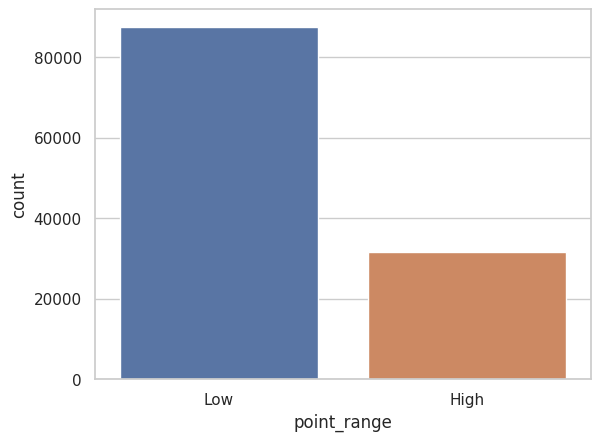

In [28]:
sns.countplot(x=wine["point_range"])

In [29]:
low_point_wine = wine[wine["point_range"] == "Low"]
low_point_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,point_range
0,Italy,"[aromas, include, tropical, fruit, broom, brim...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Low
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Low


In [30]:
#create list of unique words per each low points review
low_point_words = pd.Series([x for item in low_point_wine.description for x in set(item)])

In [31]:
low_point_words.value_counts()

flavors          41779
wine             40355
aromas           27748
fruit            26405
palate           24627
                 ...  
augur                1
boscarellis          1
pensive              1
wellmanicured        1
welldrained          1
Length: 36801, dtype: int64

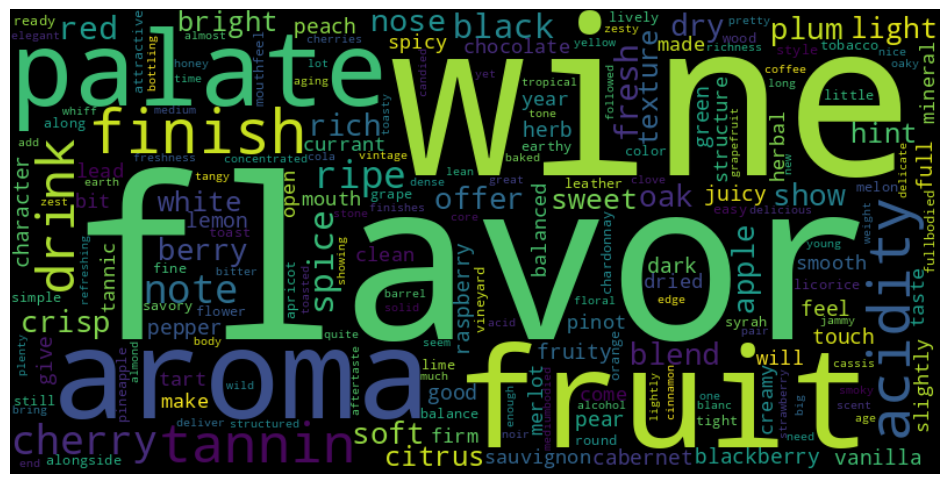

In [32]:
low_point_wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, collocations=False).generate(' '.join(list(low_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(low_point_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
high_point_wine = wine[wine["point_range"] == "High"]
high_point_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,point_range
119,France,"[mediumgold, color, complex, inviting, nose, l...",Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion,High
120,Italy,"[slightly, backward, particularly, given, vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto,High
121,US,"[vineyard, one, better, chardonnay, sources, a...",Stuhlmuller Vineyard,92,36.0,California,Alexander Valley,Sonoma,NaN,NaN,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,Chardonnay,Matrix,High
122,US,"[defines, rockpile, zinfandel, intensity, frui...",Rockpile Cemetary Vineyard,92,39.0,California,Rockpile,Sonoma,NaN,NaN,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Zinfandel,Mauritson,High
123,Australia,"[blend, roughly, twothirds, shiraz, onethird, ...",Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons,High


In [35]:
high_point_words = pd.Series([x for item in high_point_wine.description for x in set(item)])

In [36]:
high_point_words.value_counts()

wine               17303
flavors            12859
fruit              10819
drink               9375
palate              9193
                   ...  
greeces                1
ultrarefreshing        1
devison                1
sauvignonsyrah         1
spongey                1
Length: 27223, dtype: int64

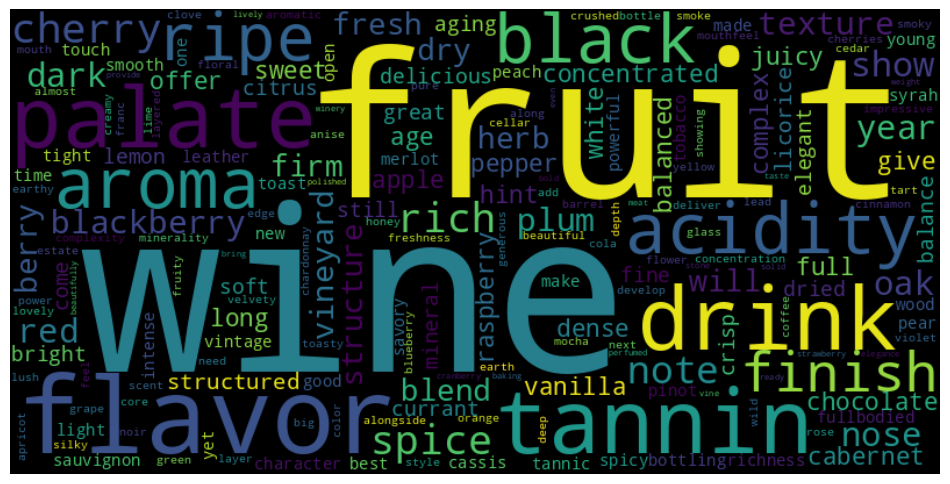

In [37]:
high_point_wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, collocations=False).generate(' '.join(list(high_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(high_point_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
#Experimenting with adding some stop words
stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavor", "fruit", "aroma", "tannin", "palate", "acidity", "flavors", "aromas", "tannins", "drink", "finish"])

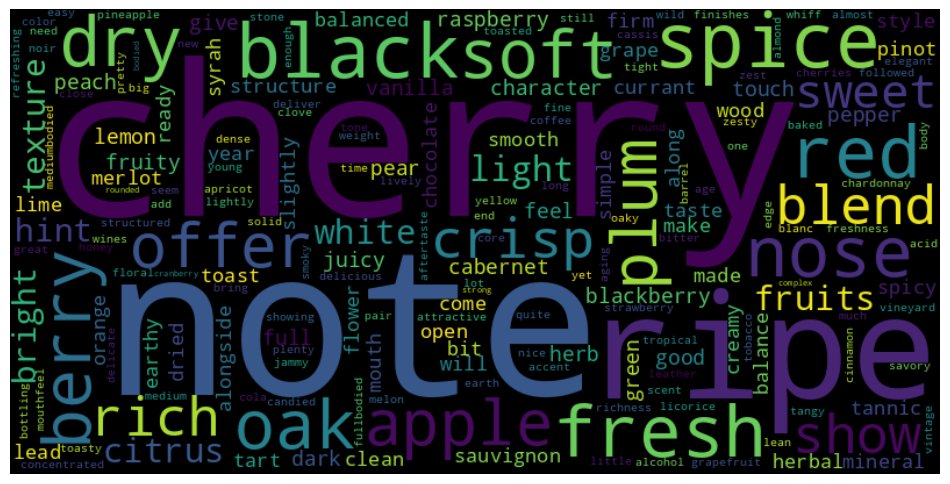

In [39]:
low_point_wordcloud2 = WordCloud(stopwords=stopwords, width=800, height=400, collocations=False).generate(' '.join(list(low_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(low_point_wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

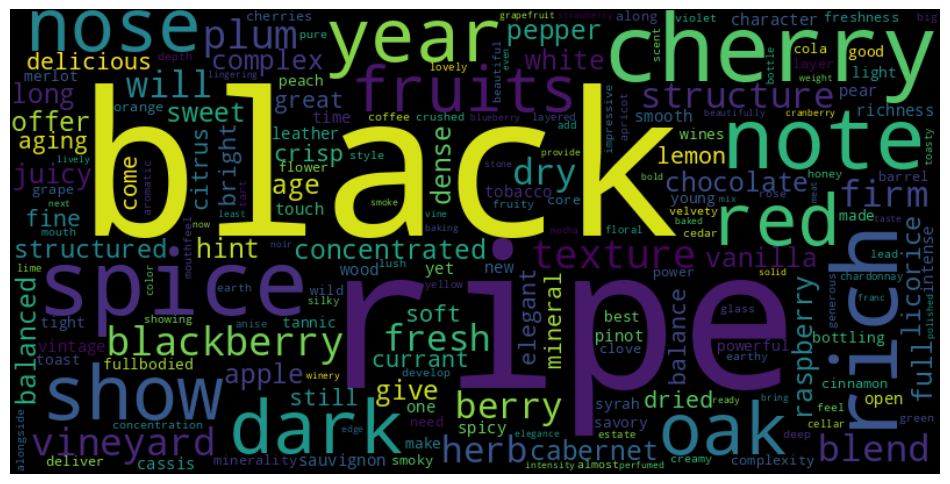

In [40]:
high_point_wordcloud2 = WordCloud(stopwords=stopwords, width=800, height=400, collocations=False).generate(' '.join(list(high_point_words)))

plt.figure(figsize=(12, 10))
plt.imshow(high_point_wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
wine.variety.value_counts()[:20]

Pinot Noir                  12200
Chardonnay                  10784
Cabernet Sauvignon           8827
Red Blend                    8225
Bordeaux-style Red Blend     6381
Riesling                     4760
Sauvignon Blanc              4547
Syrah                        3825
Rosé                         3216
Merlot                       2890
Nebbiolo                     2599
Zinfandel                    2525
Sangiovese                   2460
Malbec                       2446
Portuguese Red               2269
White Blend                  2172
Sparkling Blend              1771
Tempranillo                  1667
Rhône-style Red Blend        1341
Pinot Gris                   1319
Name: variety, dtype: int64

In [42]:
#Check number of varieties only found once in dataset - Could potentially need to be removed
len(wine.groupby("variety").filter(lambda x:len(x)==1))

154

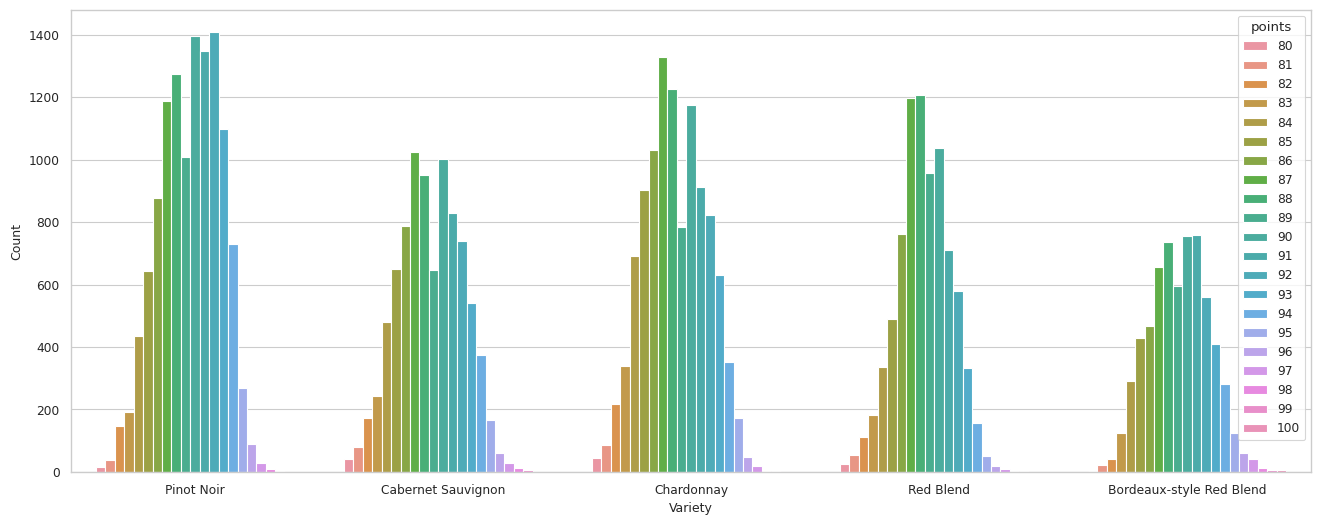

In [43]:
wine_5varieties = wine.groupby('variety').filter(lambda x:len(x)>=6300)
plt.figure(figsize=(16,6))
sns.set_context("paper", rc={"font.size":9,"axes.titlesize":9,"axes.labelsize":9}) 
sns.countplot(x="variety",  hue="points", data=wine_5varieties)
plt.ylabel('Count')
plt.xlabel('Variety')
plt.show();

<ipython-input-44-3f8b7868b7c0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  varieties.mean().sort_values(by="price",ascending=False)["price"].plot.bar()


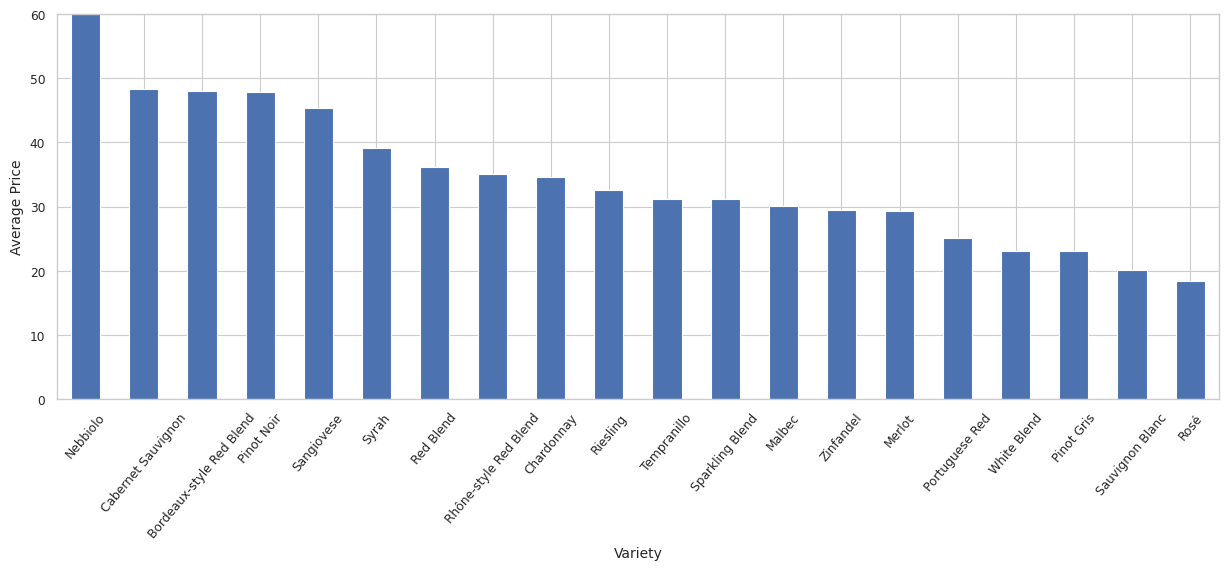

In [44]:
variety_top5 = wine.groupby("variety").filter(lambda x:len(x)>=1319)
varieties = variety_top5.groupby("variety")

plt.figure(figsize=(15,5))
varieties.mean().sort_values(by="price",ascending=False)["price"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Variety", fontsize=10)
plt.ylabel("Average Price", fontsize=10)
plt.ylim([0, 60])
plt.show();

<ipython-input-45-dafc541e3409>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  varieties.mean().sort_values(by="points",ascending=False)["points"].plot.bar()


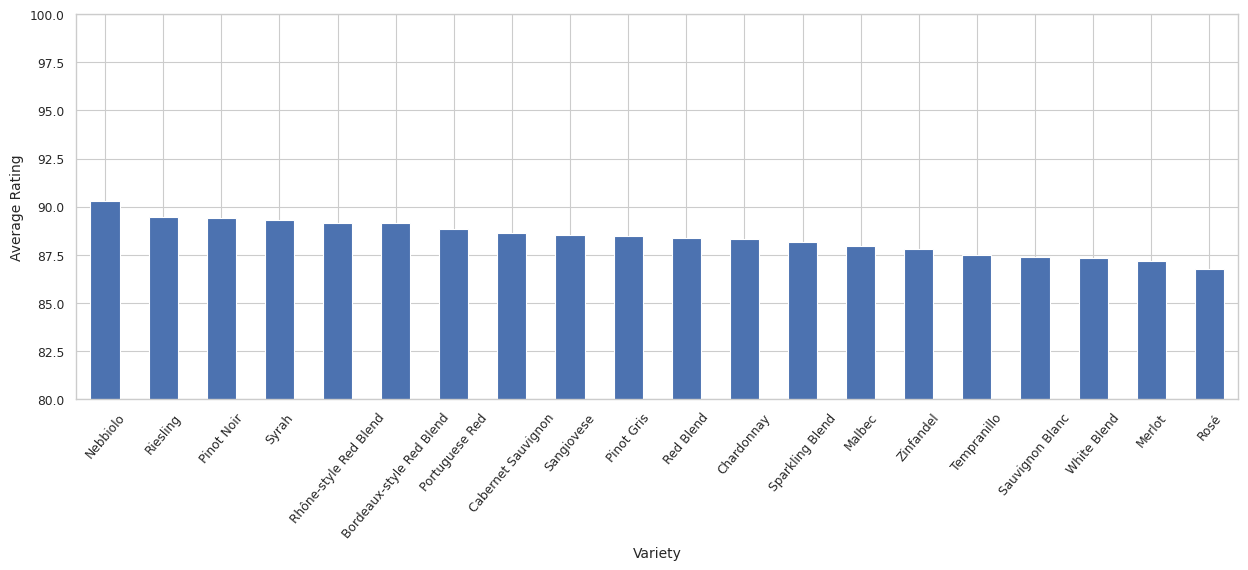

In [45]:
plt.figure(figsize=(15,5))
varieties.mean().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Variety", fontsize=10)
plt.ylabel("Average Rating", fontsize=10)
plt.ylim([80, 100])
plt.show();

In [46]:
wine.country.value_counts()

US                        50298
France                    19771
Italy                     17830
Spain                      6021
Portugal                   5222
Chile                      4178
Argentina                  3543
Austria                    3023
Australia                  2185
Germany                    1990
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      429
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     101
Uruguay                      98
Turkey                       80
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

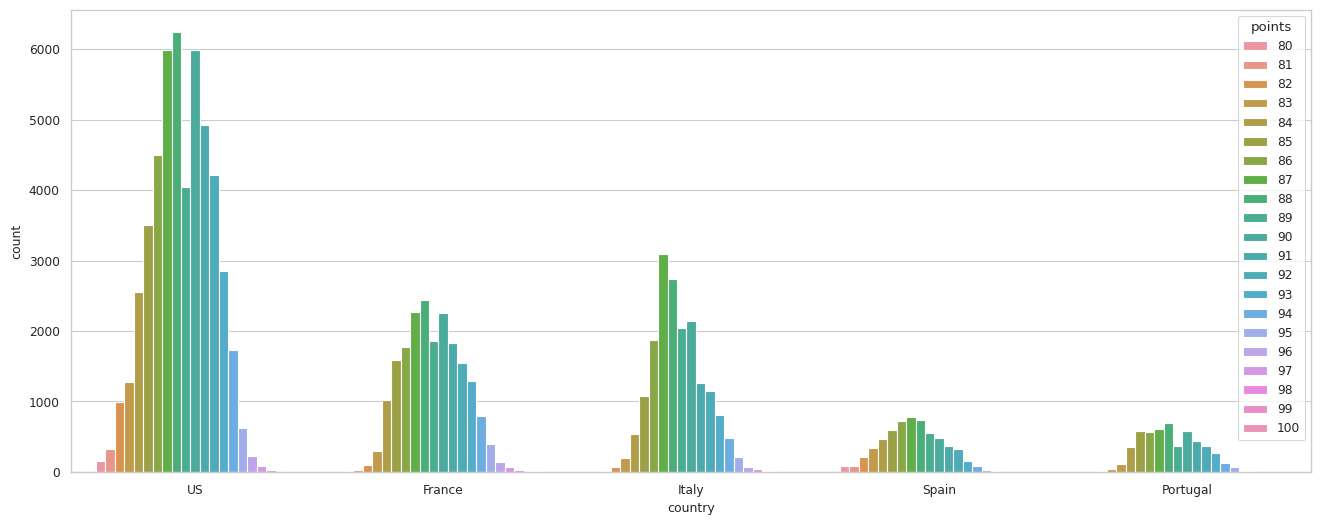

In [47]:
wine_5countries = wine.groupby('country').filter(lambda x:len(x)>=5000)
plt.figure(figsize=(16,6))
sns.countplot(x="country",  hue="points", data=wine_5countries, order=wine_5countries['country'].value_counts().index);

In [48]:
countries_100reviews = wine.groupby("country").filter(lambda x:len(x)>=100)
country = countries_100reviews.groupby("country")

<ipython-input-49-d1b8d28b1bef>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country.mean().sort_values(by="points",ascending=False)["points"].plot.bar()


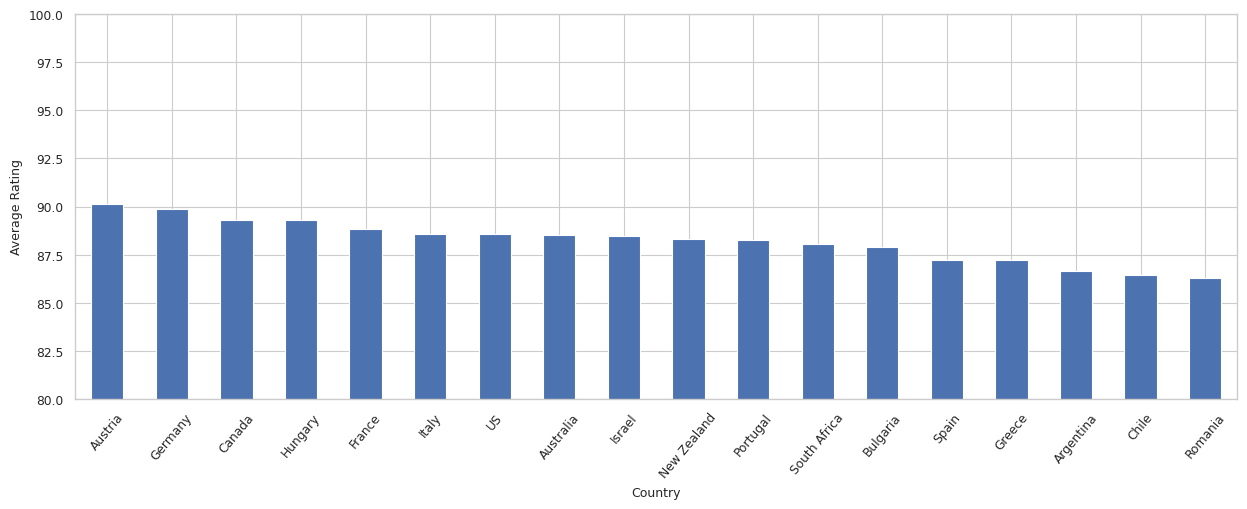

In [49]:
plt.figure(figsize=(15,5))
country.mean().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.ylim([80, 100])
plt.show()

## Correlation between features

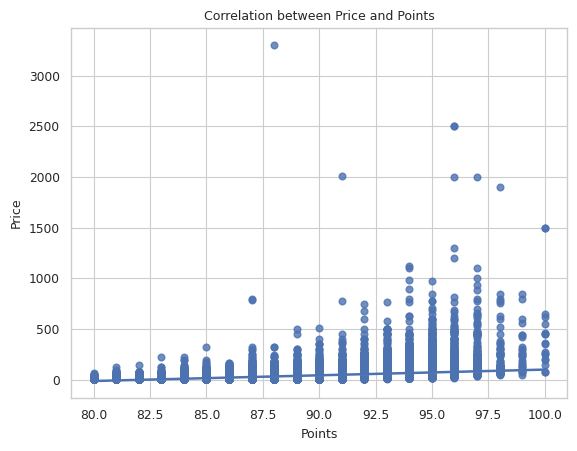

In [50]:
sns.regplot(x='points', y='price', data=wine)
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Correlation between Price and Points')
plt.show()

In [51]:
wine.corr()

<ipython-input-51-912b141e35eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,points,price
points,1.000000,0.416785
price,0.416785,1.000000


# Data Pre-Processing

In [ ]:
# To Dos - AS
## drop taster_name and taster_twitter_handle
## description column already clean
## drop rows where price, country/province, and variety is null
## handle single occurrences in variety feature -> remove?


In [52]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'point_range'],
      dtype='object')

In [53]:
#drop taster_name and taster_twitter_handle
wine_2 = wine.drop(['taster_name', 'taster_twitter_handle'], axis = 1)
wine_2.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,point_range
0,Italy,"[aromas, include, tropical, fruit, broom, brim...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Low
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Low


In [54]:
wine_2.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'title', 'variety', 'winery', 'point_range'],
      dtype='object')

In [55]:
wine_2.shape

(118971, 12)

In [56]:
wine_2.isnull().sum()

country           59
description        0
designation    34301
points             0
price           8265
province          59
region_1       19497
region_2       72345
title              0
variety            1
winery             0
point_range        0
dtype: int64

In [57]:
# remove rows with price of null
wine_2 = wine_2.dropna(subset=['price'])

#shape should now be 118971 - 8265 = 110706
wine_2.shape

(110706, 12)

In [58]:
wine_2.isnull().sum()

country           55
description        0
designation    31867
points             0
price              0
province          55
region_1       17958
region_2       64280
title              0
variety            1
winery             0
point_range        0
dtype: int64

In [59]:
## remove rows with country of null
wine_2 = wine_2.dropna(subset=['country'])

#shape should now be 110706 - 55 = 110651
wine_2.shape

(110651, 12)

In [60]:
wine_2.isnull().sum()

country            0
description        0
designation    31857
points             0
price              0
province           0
region_1       17903
region_2       64225
title              0
variety            1
winery             0
point_range        0
dtype: int64

In [61]:
## remove rows with variety of null
wine_2 = wine_2.dropna(subset=['variety'])

#shape should now be 110651 - 1 = 110650
wine_2.shape

(110650, 12)

In [62]:
#All rows with null values for our modeling have now been removed 
wine_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110650 entries, 1 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      110650 non-null  object 
 1   description  110650 non-null  object 
 2   designation  78794 non-null   object 
 3   points       110650 non-null  int64  
 4   price        110650 non-null  float64
 5   province     110650 non-null  object 
 6   region_1     92748 non-null   object 
 7   region_2     46426 non-null   object 
 8   title        110650 non-null  object 
 9   variety      110650 non-null  object 
 10  winery       110650 non-null  object 
 11  point_range  110650 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.0+ MB


In [63]:
#Dataset is dominated by U.S. -> Country may be too broad
wine_2.country.value_counts(normalize=True)*100

US                        45.259828
France                    14.288296
Italy                     13.927700
Spain                      5.380931
Portugal                   4.042476
Chile                      3.726164
Argentina                  3.163127
Austria                    2.284681
Australia                  1.949390
Germany                    1.761410
New Zealand                1.120651
South Africa               1.079982
Israel                     0.409399
Greece                     0.383190
Canada                     0.202440
Bulgaria                   0.119295
Hungary                    0.115680
Romania                    0.091279
Uruguay                    0.088568
Turkey                     0.072300
Georgia                    0.066878
Slovenia                   0.063263
Croatia                    0.061455
Mexico                     0.061455
England                    0.053321
Moldova                    0.050610
Brazil                     0.039765
Lebanon                    0

In [64]:
#California still dominates the province region - but this feature is much less top-heavy than country
(wine_2.province.value_counts(normalize=True)*100)[:50]

California              30.181654
Washington               7.140533
Oregon                   4.436512
Tuscany                  4.234975
Bordeaux                 3.249887
Northern Spain           3.159512
Mendoza Province         2.711252
Piedmont                 2.549480
Burgundy                 2.526887
New York                 2.206959
Veneto                   1.868052
Alsace                   1.726164
Northeastern Italy       1.643922
Sicily & Sardinia        1.283326
Loire Valley             1.280615
South Australia          1.134207
Southwest France         1.101672
Champagne                0.966109
Southern Italy           0.949842
Douro                    0.940804
Provence                 0.916403
Central Italy            0.912788
Catalonia                0.875734
Rhône Valley             0.855852
Mosel                    0.838681
Colchagua Valley         0.695888
Beaujolais               0.683235
Alentejano               0.677813
Virginia                 0.648893
Marlborough   

In [65]:
#relationship between province and region_2 -> Region_2 is only populated for a few U.S. states
wine_2.groupby(["province", "region_2"]).size()

province    region_2         
California  California Other      2460
            Central Coast        10117
            Central Valley         987
            Napa                  6346
            Napa-Sonoma           1078
            North Coast            528
            Sierra Foothills      1344
            Sonoma                8353
            South Coast            239
New York    Finger Lakes          1631
            Long Island            606
            New York Other         205
Oregon      Oregon Other           668
            Southern Oregon        832
            Willamette Valley     3133
Washington  Columbia Valley       7413
            Washington Other       486
dtype: int64

In [66]:
print("Number of unique region_1:", len(wine_2.region_1.value_counts()))
wine_2.region_1.value_counts(normalize=True)[:10]

Number of unique region_1: 1204


Napa Valley             0.044874
Columbia Valley (WA)    0.040669
Russian River Valley    0.030782
California              0.026189
Mendoza                 0.022912
Paso Robles             0.022847
Willamette Valley       0.022696
Alsace                  0.018502
Finger Lakes            0.015483
Sonoma Coast            0.014750
Name: region_1, dtype: float64

In [67]:
#Too many unique provinces to use
#Combining province and region_2 (for US states) should give us the best balance

#Create location column as duplicate of province to start
wine_2['location'] = wine_2.loc[:, 'province']

#For U.S states with region_2 we will assign this as the location
wine_2.loc[(wine_2['country']=='US') & (wine_2['region_2'].notnull()), 'location'] = wine_2['region_2']

In [71]:
#Not too top heavy, a manageable amount of unique values while providing a nice level of granularity compared to just using country
(wine_2.location.value_counts(normalize=True)*100)

Central Coast          9.143244
Sonoma                 7.549028
Columbia Valley        6.699503
Napa                   5.735201
Tuscany                4.234975
                         ...   
Vlootenburg            0.000904
Ticino                 0.000904
Breede River Valley    0.000904
Lemesos                0.000904
Neuchâtel              0.000904
Name: location, Length: 437, dtype: float64

In [69]:
#Is designation usable? - Probably not... extremely large amount of unique values and values aren't standardized (reserve vs. reserva vs. riserva)
wine_2.designation.value_counts()

Reserve                          1843
Estate                           1215
Reserva                          1137
Estate Grown                      563
Riserva                           559
                                 ... 
Demoiselle Tête de Cuvée Rosé       1
Prestige Brut Rosé                  1
Grand Brut                          1
Passerina                           1
Lieu-dit Harth Cuvée Caroline       1
Name: designation, Length: 35737, dtype: int64

In [70]:
#Very very many single value occurrences -> This won't be useful
len(wine_2.groupby("designation").filter(lambda x:len(x)==1))

23778

In [83]:
#Winery may be more usable than designation... still a significant amount of unique values though
wine_2.winery.value_counts()

Williams Selyem          204
Testarossa               200
Wines & Winemakers       197
DFJ Vinhos               194
Chateau Ste. Michelle    170
                        ... 
Corinto                    1
Ramsay                     1
Valle Rojo                 1
Sombrero                   1
Penedo Borges              1
Name: winery, Length: 15841, dtype: int64

In [84]:
#Too many single value occurrences -> This won't be useful
len(wine_2.groupby("winery").filter(lambda x:len(x)==1))

4391

In [ ]:
# one hot encode the following column
## variety - do we want to remove single value occurrences?
## location

### One hot encoding

In [72]:
wine_2 = pd.get_dummies(wine_2, columns=['location', 'variety'])
wine_2.shape

(110650, 1139)

In [ ]:
# Finalize stop words 
# Shane to look into cleaning up stop words and descriptions

# descriptions are created by the reviewer, cant use in model... document this better -- its not likely that this can be used as a reliable source that can be used to train our model on. It is not something that will be there for a new unreviewed wine. 

###Transforming "price"

In [73]:
price = wine_2['price']

In [74]:
price.describe()

count    110650.000000
mean         35.584998
std          41.891726
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

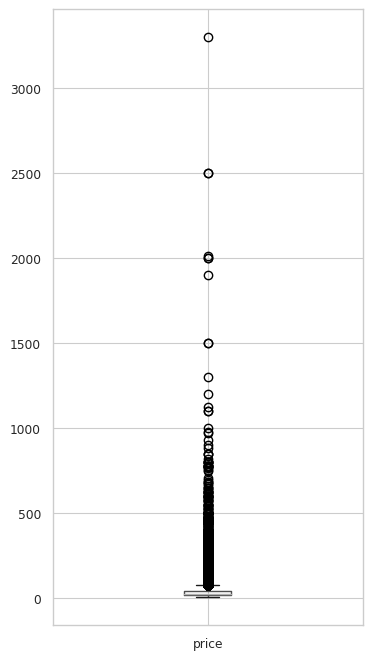

In [75]:
wine_2.boxplot(column=['price'], figsize=(4,8));

<ipython-input-76-8b66780e9cf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price)


<Axes: xlabel='price', ylabel='Density'>

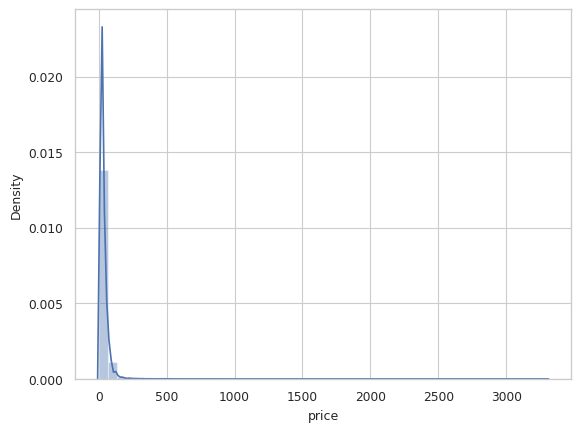

In [76]:
sns.distplot(price)

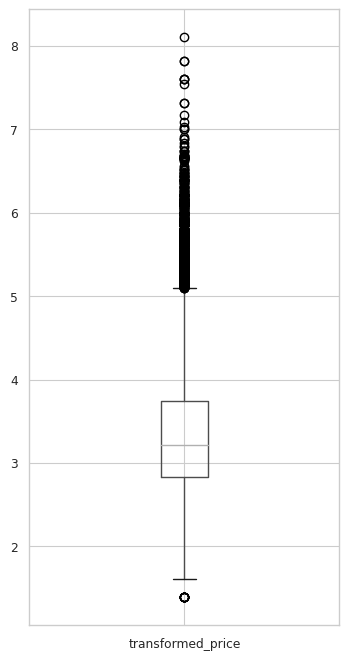

In [77]:
wine_2['transformed_price'] = np.log(price)
wine_2.boxplot(column=['transformed_price'], figsize=(4,8));

In [78]:
transformed_price = wine_2['transformed_price']
transformed_price.describe()

count    110650.000000
mean          3.316639
std           0.658864
min           1.386294
25%           2.833213
50%           3.218876
75%           3.737670
max           8.101678
Name: transformed_price, dtype: float64

<ipython-input-79-f65a9a6d5e45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_price)


<Axes: xlabel='transformed_price', ylabel='Density'>

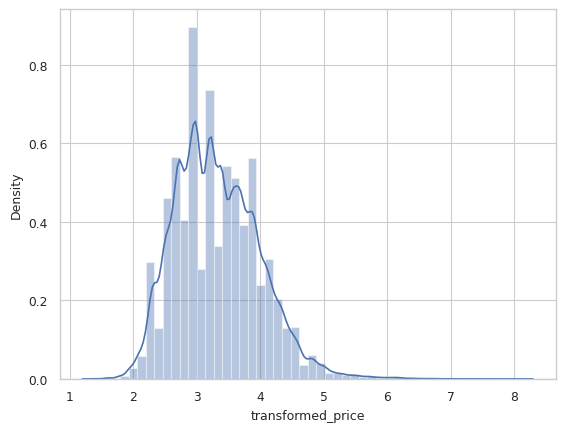

In [79]:
sns.distplot(transformed_price)

### Transforming "points"

Text(0.5, 0, 'Points')

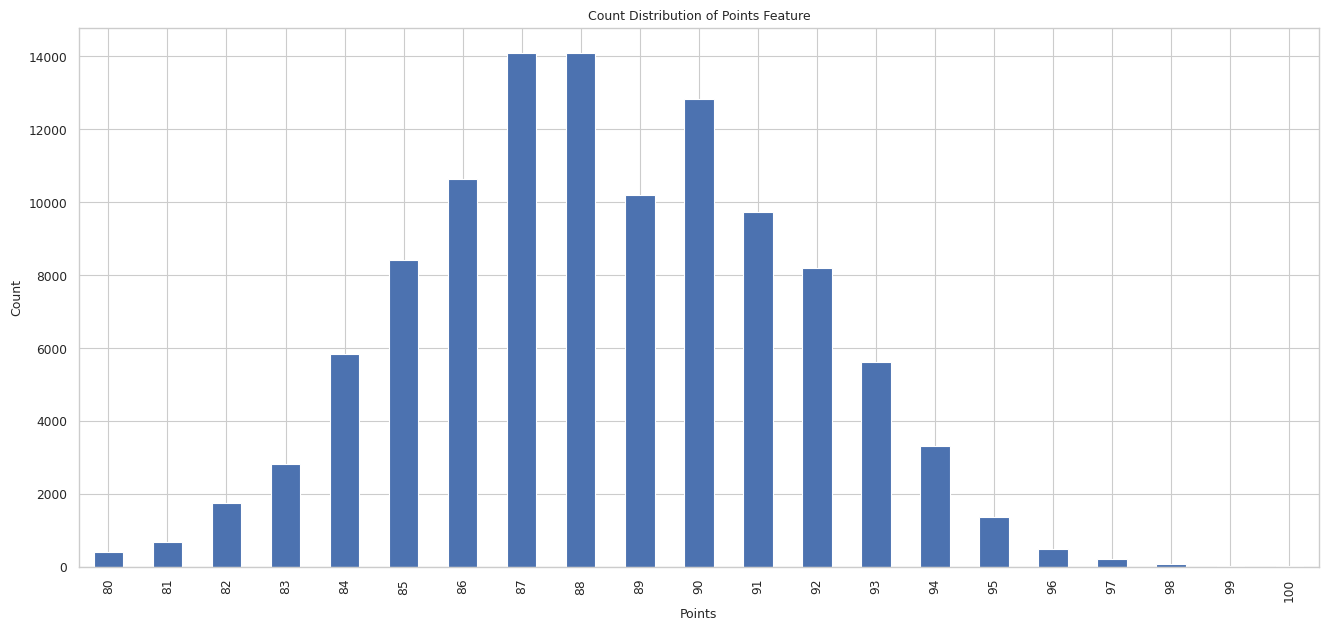

In [80]:
# Transformation of points feature 
plt.figure(figsize=(16,7))
wine_2['points'].value_counts().sort_index().plot.bar()
plt.title("Count Distribution of Points Feature")
plt.ylabel('Count')
plt.xlabel('Points')

Text(0.5, 0, 'Points')

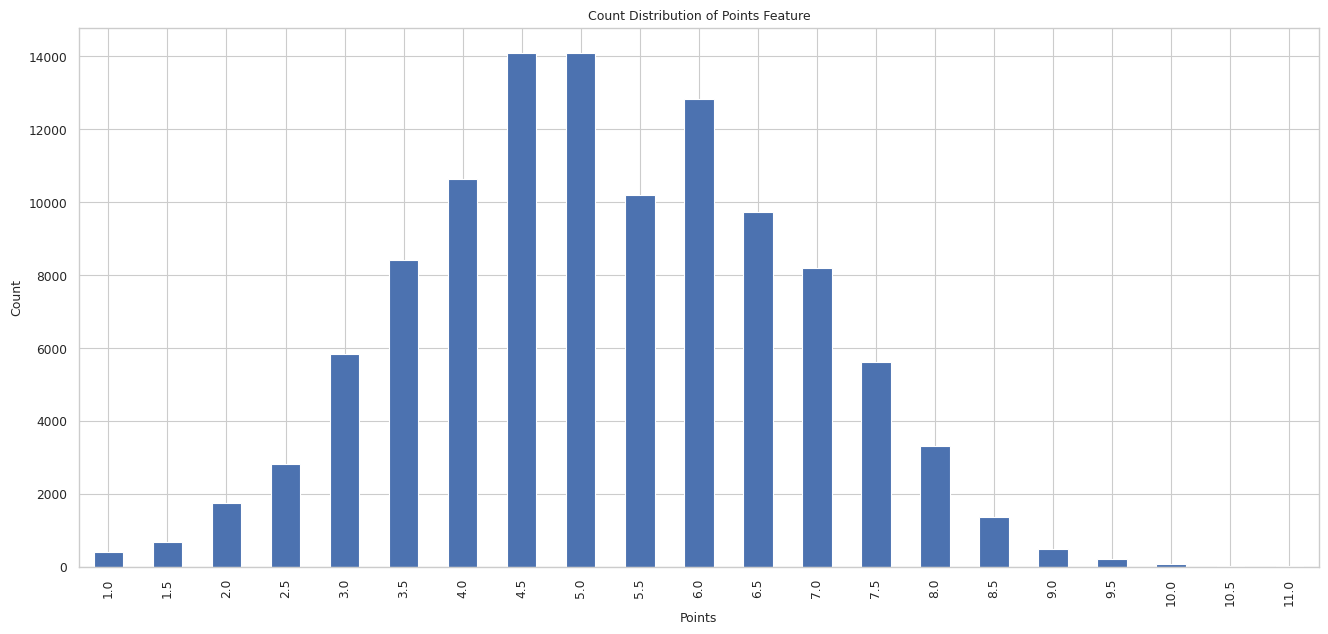

In [81]:
wine_2['points'] = (wine_2['points'] - 80) * 0.5 + 1
plt.figure(figsize=(16,7))
wine_2['points'].value_counts().sort_index().plot.bar()
plt.title("Count Distribution of Points Feature")
plt.ylabel('Count')
plt.xlabel('Points')

In [82]:
#Visualize the data after pre-processing
wine_2.head()

,country,description,designation,points,price,province,region_1,region_2,title,winery,...,variety_Yapincak,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası,variety_Žilavka,transformed_price
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,4.5,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,...,0,0,0,0,0,0,0,0,0,2.708050
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,4.5,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,...,0,0,0,0,0,0,0,0,0,2.639057
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,4.5,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,...,0,0,0,0,0,0,0,0,0,2.564949
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,4.5,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,...,0,0,0,0,0,0,0,0,0,4.174387
5,Spain,"[blackberry, raspberry, aromas, show, typical,...",Ars In Vitro,4.5,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tandem,...,0,0,0,0,0,0,0,0,0,2.708050
